# A. First linear regression using Python

In [119]:
import pandas as pd #manipulation des tab
import numpy as np #calcule
import matplotlib.pyplot as plt #graphes
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
filename ="tabBats.txt"

### 1) On veut trouver le lien qui existe entre les variables BOW (Body mass) et BRW(brain mass) 

#### a) Use the corresponding Python command to plot BOW/BRW. What type of graphic is displayed ?

In [122]:
#On récupère les données
table = pd.read_csv(filename, sep=" ", header=0) #lecture de table sans header
tab = table[["BOW", "BRW"]]#on affiche les 5 premières lignes pour vérifier
tab.head()

,BOW,BRW
0,136.3,2070.00
1,120.0,2210.00
2,58.7,1310.00
3,48.3,1184.33
4,184.0,3028.00


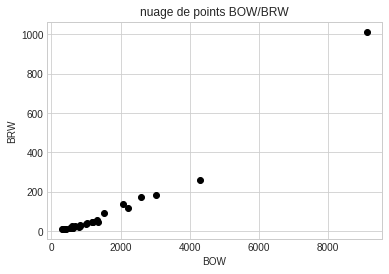

In [123]:
#Affichage des données de BOW par rapport à BRW
plt.scatter(tab["BRW"],(tab["BOW"]) , c='black') # on tracele nuage de points
#on défint qqs caractéristiques du graphes
plt.style.use('seaborn-whitegrid')
plt.title('nuage de points BOW/BRW')
plt.xlabel('BOW') 
plt.ylabel('BRW')
plt.show()


Le graphique affiché est un nuage de points BRW par rapport à BOW

#### b) Describe the resulting graph. What type of link to you notice between the two variables ? Is this tendency verified for all individuals ?

#### - Description du graphe

On constate que les points sur le graphe sont regroupés près d'une ligne imaginaire qui part du coin inférieur gauche au coin supérieur droit.

#### - Type de lien entre ces 2 variables

Suite à ce constat, on peut dire que la relation entre les 2 variables est postive ou directe c'est-à-dire une augmentation de la valeur de x implique une augmentation de celle de y.

#### - Vérification de la tendance pour tous les individus(observations ou lignes)

Cette tendance n'est malheureusement pas vérifiée pour tous les individus car il y a des individus qui semblent être très éloignés de cette ligne imaginaire ou encore des autres. Cela indique sûrement l'existence des valeurs aberrantes.

#### c) Write down the equation of the regression model that seems suited for this data set

Etant donnée qu'on a une variable quantitative qui dépend d'une autre, le modèle de regression qui semble correspondre à ce jeu de données c'est le modèle de regression linéaire simple. L'équation qui correspond à ce modèle est la suivante :
$ y_{pred} = b_0 + b_1*x $

### 2) Use the corresponding command Python to start the linear regression. Display the corresponding Python variable to know the regression coefficients.

In [130]:
# On trouve les coefficients de regression de BRW
# BOW (masse corporelle) correspond à la variable explicative
# On redimensionne le tableau des données de BOW pour qu'elle soit en 2D
# En effet, l'idée c'est d'avoir une colonne pour chaque ligne de y
#On note y la variable BRW et x la variable BOW
y = tab['BRW'].values
#print("Variable à expliquer, BRW = ", y)
x = tab['BOW'].values.reshape(-1,1)
model = LinearRegression() #on définit le modèle de regression linéaire
model.fit(x, y) #calcule les valeurs b0 et b1 pour une regression linéaire simple
b0 = model.intercept_
b1 = model.coef_[0]
print("Coefficients de regressions de y càd BRW : ")
print("\t 𝑏₀ = ",b0)
print("\t 𝑏₁ = ",b1)
print("Ainsi l'équation de regression linéaire est : ")
print("\t Y = {:.5} + {:.4}X".format(b0, b1))

Coefficients de regressions de y càd BRW : 
	 𝑏₀ =  623.4469035692691
	 𝑏₁ =  8.999877638992249
Ainsi l'équation de regression linéaire est : 
	 Y = 623.45 + 9.0X


### 3. Plot this variable

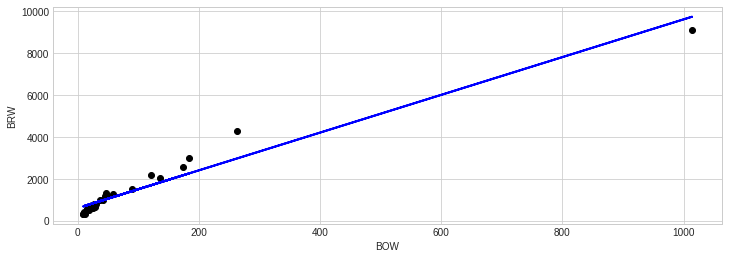

In [171]:
y_pred = model.predict(x)
plt.figure(figsize=(12, 4))
plt.scatter(tab['BOW'],tab['BRW'],c='black')
plt.plot(tab['BOW'],y_pred,c='blue',linewidth=2)
plt.xlabel("BOW")
plt.ylabel("BRW")
plt.show()

#### - Explain the significance of each diagram displayed

Dans ce graphe, on a 2 diagrammes :
- un ensemble de points (en noir) : le nuage de points
- une ligne droite (en bleu) : la droite de regression linéaire de y en fonction de x

Les points du nuage sont généralement regroupés en bas sur une partie de la droite; ce qui rend difficile l'identification de chacun. On retrouve néanmoins beaucoup d'autres points qui sont décalés de la droite => il s'agit des valeurs les plus extrèmes de BOW et BRW. Les écarts entre variables prédictives sont de 200 pour une pente de 9.

#### - Based on the diagrams, what can you say on the validity of these regression results and on the data ?

En se basant sur ces observations, nous pouvons en déduire que cette droite de regression s'ajuste plus ou moins bien sur les données. Il sera nécessaire de faire des améliorations.

### 4. Use the corresponding Python command to find the correlation coefficients.

In [132]:
#Calcul du coefficient de correlation
r = tab.corr()
print(r)

          BOW       BRW
BOW  1.000000  0.974699
BRW  0.974699  1.000000


#### a. Explain and comment the results on the correlation coefficients

Pour toutes les combinaisons possibles entre les 2 variables, r est positif.
- La corrélation de 1 entre les variables (BOW et BOW) d'une part puis (BRW et BRW) est bien justifié car il s'agit des mêmes variables. La rélation est donc parfaite entre 2 variables identiques.
- La corrélation  positive entre BOW et BRW indique qu'il y a une dépendance forte de BRW sur BOW

#### b. Compute the residuals and explain and comment the results on the residuals.

In [134]:
residuals = y - y_pred
print(residuals)

[ 219.86977424  506.56777975  158.26027902  126.18900647  748.57561086
 -304.84560654 -233.94390572 -193.8451171  -185.74510486  -65.74326945
  172.0585415  -319.5456922  1308.58515501 -628.32282951 -181.44494579
  299.65873727   82.66412116 -403.64545971   47.45761155 -187.80351784
  406.57426489 -385.26580477 -237.64472554 -347.54581456 -187.24443188
   23.55811323 -157.24492132  -35.84413821  -44.34370995]


In [160]:
df = pd.DataFrame({'BRW actuel': y, 'BRW prédi': y_pred, 'résidu': residuals})
df.head()

,BRW actuel,BRW prédi,résidu
0,2070.00,1850.130226,219.869774
1,2210.00,1703.432220,506.567780
2,1310.00,1151.739721,158.260279
3,1184.33,1058.140994,126.189006
4,3028.00,2279.424389,748.575611


#### - Comment

On constate qu'il y a des valeurs positives et négatives du résidu.

#### - Explain

Les valeurs positives pour le résidu signifient que la prédiction était trop faible et des valeurs négatives signifient que la prédiction était trop élevée.

#### c. Explain what the $ R^2$ coefficient represent in this result.

In [136]:
score = model.score(x,y)
print("𝑅² =", score)

𝑅² = 0.9500384360421301


𝑅² représente le coefficient de détermination. Il permet d'évaluer l'exactitude d'un modèle.

#### d. Conclusion

Comme R²=0.95, ce qui revient à dire que le modèle de regression linéaire s'ajuste à 95 % à ce dataset pour la prédiction des BRW en fonction de BOW. Nous supposons que les 5% restant sont causés par les valeurs extrèmes qu'on a pu observées à travers les diagrammes.

# B. Second linear regression

### 1. Create a new array tab2 from which you will remove ”Pteropus vampyrus”.

Etant donné que ”Pteropus vampyrus” correspond à la ligne 13, On a formé tab2 en excluant cette ligne comme suit :

In [146]:
tab2_a = table[0:13]
tab2_b = table[14:29]
tab2=pd.concat([tab2_a, tab2_b])
tab2 = tab2[['BOW', 'BRW']]
tab2.head()

,BOW,BRW
0,136.3,2070.00
1,120.0,2210.00
2,58.7,1310.00
3,48.3,1184.33
4,184.0,3028.00


#### a. What is the difference between tab and tab2 correlation wise.

In [147]:
r1 = tab.corr()
print("Coefficients de corrélation de tab\n", r1)
r2 = tab2.corr()
print("\n Coefficients de corrélation de tab2\n", r2)

Coefficients de corrélation de tab
           BOW       BRW
BOW  1.000000  0.974699
BRW  0.974699  1.000000

 Coefficients de corrélation de tab2
          BOW      BRW
BOW  1.00000  0.98885
BRW  0.98885  1.00000


La corrélation entre BOW et BRW dans tab2 est supérieur à celle dans tab

#### b. Why do you think it is better to work with tab2 instead of tab ?

Après vérification, nous avons constaté que la ligne 13 qu'on a supprimé dans tab contenait les valeurs les plus extrèmes (outliers) de BRW et BOW; ce qui devrait occasionner les 95 % d'exactitude du modèle choisi.
Aussi, du fait que la corrélation (r) dans tab2 est supérieure à r dans tab indique que la relation est encore plus forte entre BRW et BOW. De ce fait, l'application d'un modèle sur tab2 donnera des meilleurs résultats.

### 2)

#### - Graphique de BOW/BRW pour tab2

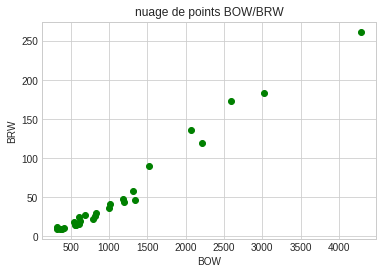

In [148]:
#Affichage des données de BOW par rapport à BRW
plt.scatter(tab2["BRW"],(tab2["BOW"]) , c='green') # on trace le nuage de points
#on défint qqs caractéristiques du graphes
plt.style.use('seaborn-whitegrid')
plt.title('nuage de points BOW/BRW')
plt.xlabel('BOW') 
plt.ylabel('BRW')
plt.show()

#### - Coefficents de regression pour tab2

In [175]:
y2 = tab2['BRW'].values
#print("Variable à expliquer, BRW = ", y)
x2 = tab2['BOW'].values.reshape(-1,1)
model2 = LinearRegression() #on définit le modèle de regression linéaire
model2.fit(x2, y2) #calcule les valeurs b0 et b1 pour une regression linéaire simple
b0_1 = model2.intercept_
b1_1 = model2.coef_[0]
print("Coefficients de regressions de y càd BRW : ")
print("\t 𝑏₀ = ",b0_1)
print("\t 𝑏₁ = ",b1_1)
print("Ainsi l'équation de regression linéaire est : ")
print("\t Y = {:.5} + {:.4}X".format(b0_1, b1_1))

Coefficients de regressions de y càd BRW : 
	 𝑏₀ =  346.5451556610758
	 𝑏₁ =  14.509900826013135
Ainsi l'équation de regression linéaire est : 
	 Y = 346.55 + 14.51X


#### - Visualisation de la variable Y

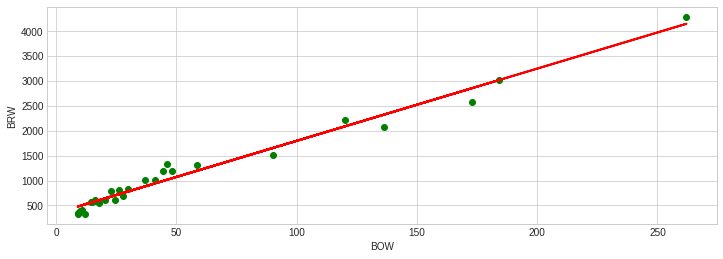

In [178]:
y_pred_2 = model2.predict(x2)
plt.figure(figsize=(12, 4))
plt.scatter(tab2['BOW'],tab2['BRW'],c='green')
plt.plot(tab2['BOW'],y_pred_2,c='red',linewidth=2)
plt.xlabel("BOW")
plt.ylabel("BRW")
plt.show()

##### Explications et commentaires du graphe obtenu

Dans ce graphe, on a 2 diagrammes :
- un ensemble de points (en vert) : le nuage de points
- une ligne droite (en rouge) : la droite de regression linéaire de y en fonction de x

Les points du nuage suivent la droite de régression. Ils s'étalent un peu plus sur la droite; ce qui permet de mieux les distinguer. On retrouve néanmoins un point situé à l'extrème droite du graphe et d'autres points qui se démarquent des autres. Les écarts entre les variables prédictives sont de 50 pour une pente de 14.

En se basant sur ces observations, nous pouvons en déduire que cette droite de regression s'ajuste mieux sur les données.

#### - interprétation du coefficient de corrélation

In [179]:
#Calcul du coefficient de correlation
r2 = tab2.corr()
r2

,BOW,BRW
BOW,1.00000,0.98885
BRW,0.98885,1.00000


Pour toutes les combinaisons possibles entre les 2 variables, r est positif.
- La corrélation de 1 entre les variables (BOW et BOW) d'une part puis (BRW et BRW) est bien justifié car il s'agit des mêmes variables. La rélation est donc parfaite entre 2 variables identiques.
- La corrélation  positive entre BOW et BRW indique qu'il y a une très forte dépendance de BRW sur BOW

#### - résidus et leurs interprétations

In [180]:
residual_2 = y2 - y_pred_2
print(residual_2)

[-254.24463825  122.26674522  111.72366585  136.95663444   11.63309235
  -86.35010442  -92.0377259     2.61029228   10.1593022    47.51078981
  203.76425758  -97.19317384  141.86082792    7.29643112  322.54841626
 -136.88722008 -191.76198541  121.03950386  -63.36411152 -269.75799856
 -157.84406508  -58.82139036 -119.68327301  -21.64515235   74.54891047
   30.39445096  116.53108567   88.74643278]


On a 12 valeurs négatives et 16 valeurs positives.
Les valeurs positives pour le résidu signifient que la prédiction était trop faible et des valeurs négatives signifient que la prédiction était trop élevée.

In [181]:
df2 = pd.DataFrame({'BRW actuel': y2, 'BRW prédi': y_pred_2, 'résidu': residual_2})
df2.head()

,BRW actuel,BRW prédi,résidu
0,2070.00,2324.244638,-254.244638
1,2210.00,2087.733255,122.266745
2,1310.00,1198.276334,111.723666
3,1184.33,1047.373366,136.956634
4,3028.00,3016.366908,11.633092


#### - Coefficient de détermination 𝑅²

In [193]:
score2 = model2.score(x2,y2)
print("𝑅² =", score2)
print ("Soit 𝑅² = ", round(score2, 2))

𝑅² = 0.9778253041251115
Soit 𝑅² =  0.98


Comme R²=0.98, ce qui revient à dire que le modèle de regression linéaire s'ajuste à 98 % à ce dataset pour la prédiction des BRW en fonction de BOW. Nous supposons que les 2% restants sont causés par les valeurs extrèmes qu'on a pu observées à travers les diagrammes.

### a. Compare the results and comment.

- L'application de la regression linéaire simple sur tab, nous donne une droite de regression d'équation $  Y = 623.45 + 9.0X $, avec un coefficient de détermination de 95 % soit 5% des valeurs aberrantes. Le coefficient de corrélation r=0.97.
- En appliquant la regression linéaire simple sur tab2, on trouve une droite de régression d'équation $  Y = 346.55 + 14.51X $ avec un coefficient de détermination de 98 % soit 2 % des valeurs aberrantes. Le coefficient de corrélation r=0.98

D'une part les ordonnées dans tab sont supérieurs à celles dans tab2 et la pente dans tab est inférieure à celle de tab2. D'autre part les coefficients de corrélation et de détermination dans tab sont inférieurs à ceux dans tab2.

On peut en déduire qu'il y a une amélioration de la trajectoire de la droite dans tab2, une relation encore plus forte dans tab2 par rapport à tab et enfin un meilleur ajustement de la droite de regression car dans tab2 on a moins des valeurs aberrantes.

### b. Are the result of this second regression better ? Explain why.

De ces observations, nous pouvons dire que tab2 donne des meilleures résultats que tab car on a 98% de coefficient  de détermination; ce qui traduit un meilleur ajustement sur les données.

# C. Third linear regression

### - Récupération des données

In [96]:
tab3 = table[["MOB", "HIP"]]
tab3.head()

,MOB,HIP
0,105.77,125.97
1,107.80,159.80
2,67.00,97.70
3,65.27,95.40
4,213.43,233.30


### - Visualisation des données de MOB/HIP

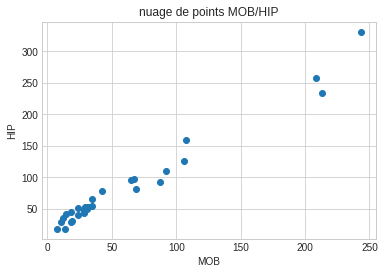

In [183]:
plt.scatter(tab3["MOB"],(tab3["HIP"]) ) # on trace le nuage de points
#on défint qqs caractéristiques du graphes
plt.style.use('seaborn-whitegrid')
plt.title('nuage de points MOB/HIP')
plt.xlabel('MOB') 
plt.ylabel('HIP')
plt.show()

On a un nuage de points où les points suivent une ligne imaginaire. Outre celà, on voit quelques points, à l'extrème droite, qui se démarquent des autres.

### - Application de la régression linéaire simple sur les données

In [187]:
# Equation de regression
x3= tab3['MOB'].values.reshape(-1,1)
y3 = tab3['HIP'].values
model3 = LinearRegression()
model3.fit(x3, y3)
print("L'équation de la regression linéaire simple est: Y = {:.4} + {:.3}X".format(model3.intercept_, model3.coef_[0]))

L'équation de la regression linéaire simple est: Y = 14.68 + 1.17X


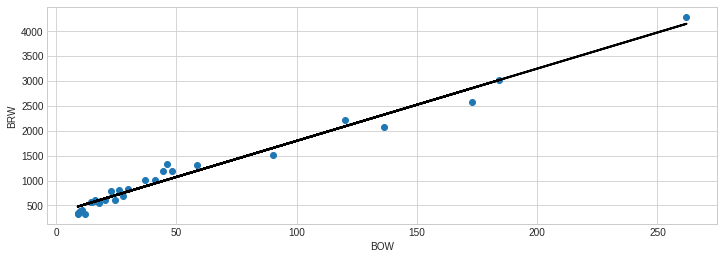

In [189]:
# Visualisation de la variable prédictive Y
y_pred_3 = model3.predict(x3)
plt.figure(figsize=(12, 4))
plt.scatter(tab2['BOW'],tab2['BRW'])
plt.plot(tab2['BOW'],y_pred_2,c='black',linewidth=2)
plt.xlabel("BOW")
plt.ylabel("BRW")
plt.show()

Les points sont bien étalés sur la droite de regression. Il y a moins de valeurs extrèmes. La moyenne des écarts entre un point du nuage et un point de la droite n'est pas très grande. IL y a malgré tout quelques valeurs aberrantes.

In [190]:
#Calcul du coefficient de corrélation
r3= tab3.corr()
print("les coefficients de corrélation sont: \n",r3)

les coefficients de corrélation sont: 
          MOB      HIP
MOB  1.00000  0.98561
HIP  0.98561  1.00000


Avec un coefficient de corrélation d'environ 0.99, la relation est presque parfaite entre MOB et HIP.

In [191]:
# Calcul du résidu
residual_3 = y3 - y_pred_3
print(residual_3)

[-12.01346867  19.44997168   4.91432336   4.63114514 -30.19273588
   6.09977612   8.58870134   3.24037226   1.8165518  -13.635657
  14.92598811   2.81478269   0.1214647   32.69523889  10.2264799
 -24.86785248  10.9007785   -4.98783851   8.52631597  -7.31519118
 -11.53049997 -13.72378222  -1.38197368  -6.29445724  -0.81899866
   0.14248885  -5.43580728   3.71798039  -0.61409693]


On a 13 valeurs négatives pour 16 positives. Or les valeurs positives pour le résidu signifient que la prédiction était trop faible et des valeurs négatives signifient que la prédiction était trop élevée.
On peut en déduire que la prédiction a été juste.

In [192]:
# Calcul du coefficient de détermination
score3 = model3.score(x3,y3)
print("𝑅² =", score3)
print ("Soit 𝑅² = ", round(score3, 2))

𝑅² = 0.9714264830887358
Soit 𝑅² =  0.97


Pour un coefficient de détermination de 0.97, cela suppose que l'ajustement de la droite par rapport aux données est de 97% pour 3 % des données aberrantes. 

Cette analyse nous permet de déduire que le modèle de regression linéaire simple s'applique bien sur ce dataset mais on peut obtenir des meilleures résultats en nettoyant certaines données aberrantes.